In [31]:
import pandas as pd
data=pd.read_csv('processed_data/data.csv')
import nltk
from nltk.corpus import stopwords
stopwords.words('english')

In [137]:
data=data[data.sender.isin(data.groupby('sender').size().pipe(lambda x: x[x>100]).index)]

In [152]:
splitted=data.body.str.lower().str.replace('[^a-z ]', '').str.split().dropna()

In [153]:
data

sender  \
64        andy.zipper@enron.com   
65        andy.zipper@enron.com   
66        andy.zipper@enron.com   
67        andy.zipper@enron.com   
68        andy.zipper@enron.com   
69        andy.zipper@enron.com   
70        andy.zipper@enron.com   
71        andy.zipper@enron.com   
72        andy.zipper@enron.com   
73        andy.zipper@enron.com   
74        andy.zipper@enron.com   
75        andy.zipper@enron.com   
76        andy.zipper@enron.com   
77        andy.zipper@enron.com   
78        andy.zipper@enron.com   
79        andy.zipper@enron.com   
80        andy.zipper@enron.com   
81        andy.zipper@enron.com   
82        andy.zipper@enron.com   
83        andy.zipper@enron.com   
84        andy.zipper@enron.com   
85        andy.zipper@enron.com   
86        andy.zipper@enron.com   
87        andy.zipper@enron.com   
88        andy.zipper@enron.com   
89        andy.zipper@enron.com   
90        andy.zipper@enron.com   
91        andy.zipper@enron.com   
92        andy.zipper@enron.com   
93        andy.zipper@enron.com   
...                         ...   
86894  tracy.geaccone@enron.com   
86895  tracy.geaccone@enron.com   
86896  tracy.geaccone@enron.com   
86897  tracy.geaccone@enron.com   
86898  tracy.geaccone@enron.com   
86899  tracy.geaccone@enron.com   
86900  tracy.geaccone@enron.com   
86901  tracy.geaccone@enron.com   
86902  tracy.geaccone@enron.com   
86903  tracy.geaccone@enron.com   
86904  tracy.geaccone@enron.com   
86905  tracy.geaccone@enron.com   
86906  tracy.geaccone@enron.com   
86907  tracy.geaccone@enron.com   
86908  tracy.geaccone@enron.com   
86909  tracy.geaccone@enron.com   
86910  tracy.geaccone@enron.com   
86911  tracy.geaccone@enron.com   
86912  tracy.geaccone@enron.com   
86913  tracy.geaccone@enron.com   
86914  tracy.geaccone@enron.com   
86915  tracy.geaccone@enron.com   
86916  tracy.geaccone@enron.com   
86917  tracy.geaccone@enron.com   
86918  tracy.geaccone@enron.com   
86919  tracy.geaccone@enron.com   
86920  tracy.geaccone@enron.com   
86921  tracy.geaccone@enron.com   
86922  tracy.geaccone@enron.com   
86923  tracy.geaccone@enron.com   

                                                    body  
64     I would like Amita to have the ability to add ...  
65     I think the broker is never really the counter...  
66     Let me try and be clear on this, as I m not su...  
67                                                   FYI  
68     Mark can we put togethr a term sheet for the b...  
69                                                   FYI  
70                                      Try this one....  
71     This is what I got back from espeed, which is ...  
72     The going gets pretty slow with all the differ...  
73     Please take a look at these prior to us gettin...  
74     How could they justify going after only electr...  
75     Probably want to grab both slots. What do you ...  
76     Actually we got a deal term sheet from them la...  
77     Did they agree to our changes and send back a ...  
78     I got this from ICE. Thought you should have a...  
79     Mark can we put togethr a term sheet for the b...  
80                                                   FYI  
81     The going gets pretty slow with all the differ...  
82     Please take a look at these prior to us gettin...  
83     How could they justify going after only electr...  
84     Actually we got a deal term sheet from them la...  
85     Did they agree to our changes and send back a ...  
86     I got this from ICE. Thought you should have a...  
87     got this from late friday. have you ever heard...  
88                                  That would be great.  
89     I think it s spelled Gaetien and I would like ...  
90     FYI on 12/11/00 Intercontinental traded 3.3BCF...  
91     I spoke with EDF Man president Mary Bergonia a...  
92     Tana,Can you please have ENA, EPMI, and Enron ...  
93     Does our confidentiality agreement with Altra ...  
...                      

In [154]:
def b(x):
    try:
        return len(x)
    except:
        print(x)
        return None
splitted.apply(b)

64        43
65        62
66       226
67         1
68        74
69         1
70         3
71        23
72        10
73        11
74        31
75        11
76        19
77        12
78        13
79        74
80         1
81        10
82        11
83        31
84        19
85        12
86        13
87        11
88         4
89        21
90         8
91        56
92        57
93        18
        ... 
86894     19
86895      5
86896     11
86897     12
86898      5
86899     11
86900     10
86901     15
86902      1
86903      5
86904     16
86905     19
86906     75
86907     11
86908     32
86909      7
86910      5
86911     47
86912     12
86913      9
86914     14
86915    286
86916      1
86917     17
86918     11
86919     75
86920      7
86921      3
86922     46
86923     10
Name: body, Length: 86350, dtype: int64

In [155]:
from itertools import chain
from collections import Counter
def get_word_count(x):
    try:
        counted=Counter(chain(*x))
        counter_words=pd.Series(counted)/len(x)
    except:
        print(x)
        raise
    return counter_words

In [156]:
words=get_word_count(splitted).to_frame().rename(columns={0:'baseline'}).query(f'baseline>5/{len(splitted)}')

In [157]:
words_by_sender=data.assign(splitted=splitted).dropna().groupby('sender').splitted.apply(get_word_count).unstack()

In [320]:
words.sort_values('baseline',ascending=False).query('baseline<0.2 and baseline>0.01')

baseline
t             0.193665
please        0.185802
my            0.177394
know          0.176259
was           0.167111
but           0.161911
by            0.161181
any           0.153631
do            0.148396
our           0.147307
am            0.145721
get           0.145061
an            0.143254
they          0.137591
all           0.136456
has           0.136445
about         0.134569
what          0.132484
so            0.131940
let           0.129056
need          0.128940
enron         0.127898
he            0.125420
out           0.124169
up            0.120614
thanks        0.120324
there         0.111720
should        0.107944
like          0.106485
call          0.101679
...                ...
against       0.010376
ie            0.010365
bring         0.010353
folks         0.010353
ready         0.010342
tonight       0.010330
tx            0.010272
operations    0.010249
necessary     0.010249
james         0.010237
past          0.010226
requested     0.010226
e             0.010214
saturday      0.010214
transmission  0.010203
eric          0.010191
paid          0.010168
required      0.010168
iso           0.010110
ca            0.010110
electric      0.010098
amendment     0.010064
capital       0.010064
provided      0.010052
cell          0.010052
dave          0.010041
november      0.010029
original      0.010029
needed        0.010029
december      0.010017

[622 rows x 1 columns]

In [158]:
rel_count=pd.merge(words_by_sender.T.reset_index(), words.reset_index(), on="index").set_index(
    "index"
).apply(lambda x: x / x.baseline, axis=1)

In [159]:
# Words per email-person, eg how many times does X say W per email, on average
# vs Words per email, how many times an emails says W, on average
%matplotlib inline
rel_count

andy.zipper@enron.com  barry.tycholiz@enron.com  \
index                                                                    
a                                   0.655751                  0.981237   
aa                                       NaN                  1.112872   
aaa                                      NaN                       NaN   
aadepartment                             NaN                       NaN   
aaron                                    NaN                       NaN   
ab                                       NaN                       NaN   
aba                                      NaN                       NaN   
abandon                                  NaN                       NaN   
abandoned                                NaN                       NaN   
abandoning                               NaN                       NaN   
abandonment                              NaN                       NaN   
abb                                      NaN                       NaN   
abbreviated                              NaN                       NaN   
abbreviation                             NaN                       NaN   
abc                                      NaN                       NaN   
abel                                     NaN                       NaN   
abelhouectect                            NaN                       NaN   
abide                                    NaN                       NaN   
abilities                                NaN                 14.745560   
ability                             1.105790                  2.318079   
able                                0.225390                  0.944976   
ableto                                   NaN                       NaN   
abn                                      NaN                       NaN   
abnormal                                 NaN                       NaN   
aboard                                   NaN                       NaN   
about                               0.479429                  0.715705   
aboutthe                                 NaN                       NaN   
above                               2.116093                       NaN   
aboveaverage                             NaN                       NaN   
abovecreate                              NaN                       NaN   
...                                      ...                       ...   
z                                        NaN                       NaN   
za                                       NaN                       NaN   
zach                                     NaN                       NaN   
zachary                                  NaN                       NaN   
zaremberg                                NaN                       NaN   
ze                                       NaN                       NaN   
zealand                                  NaN                       NaN   
zeiger                                   NaN                       NaN   
zero                                6.843941                  2.391172   
zeroed                                   NaN                       NaN   
zf                                       NaN                       NaN   
zhiyong                                  NaN                       NaN   
zimin                                    NaN                       NaN   
zimincan                                 NaN                       NaN   
zip                                      NaN                       NaN   
zipper                             58.436725                       NaN   
zippercorpenronenron                     NaN                       NaN   
zipperenronenronxgate              19.478908                       NaN   
zisman                                   NaN                       NaN   
zismanhouectect                          NaN                       NaN   
zivleyhouectect                          NaN                       NaN   
zl                         

In [194]:
#Not removing stopwords, I or please might be useful
rel_count.isnull().mean(axis=1).pipe(lambda x: x[x<0.01])

index
a         0.0
about     0.0
all       0.0
am        0.0
an        0.0
and       0.0
are       0.0
as        0.0
at        0.0
back      0.0
be        0.0
been      0.0
but       0.0
by        0.0
can       0.0
day       0.0
did       0.0
do        0.0
for       0.0
get       0.0
going     0.0
good      0.0
have      0.0
here      0.0
i         0.0
if        0.0
in        0.0
is        0.0
it        0.0
just      0.0
         ... 
or        0.0
out       0.0
please    0.0
see       0.0
so        0.0
thanks    0.0
that      0.0
the       0.0
there     0.0
they      0.0
think     0.0
this      0.0
time      0.0
to        0.0
today     0.0
until     0.0
up        0.0
us        0.0
want      0.0
was       0.0
we        0.0
what      0.0
when      0.0
who       0.0
will      0.0
with      0.0
work      0.0
would     0.0
you       0.0
your      0.0
Length: 73, dtype: float64

In [213]:
ignore_words=rel_count.isnull().mean(axis=1).pipe(lambda x: x[x>0.8]).index
rel_count[~rel_count.index.isin(ignore_words)].loc['cute'].sort_values()

jeff.dasovich@enron.com         0.382024
james.d.steffes@enron.com       0.508474
carol.clair@enron.com           0.586657
eric.bass@enron.com             0.766969
debra.perlingiere@enron.com     0.859632
kimberly.watson@enron.com       0.918891
baseline                        1.000000
gerald.nemec@enron.com          1.002904
kay.mann@enron.com              1.123851
daren.j.farmer@enron.com        1.207625
matthew.lenhart@enron.com       1.238395
shelley.corman@enron.com        1.464602
john.arnold@enron.com           1.501139
sally.beck@enron.com            2.044755
kevin.hyatt@enron.com           2.064802
marie.heard@enron.com           2.259761
tana.jones@enron.com            2.360434
scott.neal@enron.com            2.404221
jane.tholt@enron.com            2.568412
mark.whitt@enron.com            2.941477
lindy.donoho@enron.com          3.441336
chris.germany@enron.com         3.808495
larry.f.campbell@enron.com      4.026955
stacy.dickson@enron.com         4.387703
stanley.horton@e

In [333]:
rel_count.mean(axis=1).sort_values()

index
state                                                  0.632163
said                                                   0.633247
power                                                  0.703446
davis                                                  0.708234
jeff                                                   0.709222
subject                                                0.728610
re                                                     0.729386
bill                                                   0.748188
houston                                                0.755483
department                                             0.779658
edison                                                 0.780352
direct                                                 0.805622
which                                                  0.809714
energy                                                 0.812780
fax                                                    0.812853
list                              

In [334]:
data[data.body.str.contains("energy")]

sender  \
141        andy.zipper@enron.com   
270        andy.zipper@enron.com   
814     barry.tycholiz@enron.com   
815     barry.tycholiz@enron.com   
1014   benjamin.rogers@enron.com   
1015   benjamin.rogers@enron.com   
1072   benjamin.rogers@enron.com   
1073   benjamin.rogers@enron.com   
1097   benjamin.rogers@enron.com   
1098   benjamin.rogers@enron.com   
1543   benjamin.rogers@enron.com   
1617   benjamin.rogers@enron.com   
1724   benjamin.rogers@enron.com   
2093       carol.clair@enron.com   
2094       carol.clair@enron.com   
2177       carol.clair@enron.com   
2178       carol.clair@enron.com   
2271       carol.clair@enron.com   
2315       carol.clair@enron.com   
2501       carol.clair@enron.com   
2555       carol.clair@enron.com   
2616       carol.clair@enron.com   
2627       carol.clair@enron.com   
2638       carol.clair@enron.com   
2643       carol.clair@enron.com   
2648       carol.clair@enron.com   
2650       carol.clair@enron.com   
2654       carol.clair@enron.com   
2767       carol.clair@enron.com   
2914       carol.clair@enron.com   
...                          ...   
83116       tana.jones@enron.com   
83128       tana.jones@enron.com   
83320       tana.jones@enron.com   
83649       tana.jones@enron.com   
83692       tana.jones@enron.com   
83698       tana.jones@enron.com   
83703       tana.jones@enron.com   
84098       tana.jones@enron.com   
84316       tana.jones@enron.com   
84528       tana.jones@enron.com   
84530       tana.jones@enron.com   
84531       tana.jones@enron.com   
84669       tana.jones@enron.com   
84676       tana.jones@enron.com   
84915       tana.jones@enron.com   
84968       tana.jones@enron.com   
84978       tana.jones@enron.com   
85096       tana.jones@enron.com   
85292       tana.jones@enron.com   
85356       tana.jones@enron.com   
85384       tana.jones@enron.com   
85443       tana.jones@enron.com   
85590       tana.jones@enron.com   
85613       tana.jones@enron.com   
85669       tana.jones@enron.com   
85721       tana.jones@enron.com   
85796       tana.jones@enron.com   
85863       tana.jones@enron.com   
86297  tori.kuykendall@enron.com   
86508  tori.kuykendall@enron.com   

                                                    body  
141    Bruce Peterson at Korn Ferry International. He...  
270    Greg and PhilippeHaving listened to the DealBe...  
814    Stephanie and I met with Jeff Dasovich in San ...  
815    Stephanie and I met with Jeff Dasovich in San ...  
1014   It was good to see a fellow Yankee down in the...  
1015   Thanks for the informative infomation session ...  
1072   Just wanted to let you know that I received an...  
1073   Just to give you an update, I reeived an e-mai...  
1097   Professor Titman: I would like to thank you fo...  
1098   Professor Ronn: I would like to thank you for ...  
1543   Charlie: It was a pleasure meeting you yesterd...  
1617   John:With regards to the Demin water system, t...  
1724   Stan:Its been a very interesting ride these la...  
2093   Tana:As we discussed, here is my list of amend...  
2094   Ann:I will do that. Just to clarify, he will n...  
2177   Tana:As we discussed, here is my list of amend...  
2178   Ann:I will do that. Just to clarify, he will n...  
2271   Tana:As we discussed, here is my list of amend...  
2315   Joe, Jeff an Bob:Here is a summary of those co...  
2501   Tanya and Sara:Just an update on the ones that...  
2555   Anne:Sorry about the mix-up. I did talk to Mar...  
2616   John:Genia Fitzgerald, our legal assistant wil...  
2627   Bill:I will get back to you shortly.Carol St. ...  
2638   Bill:Thanks for the information. I need to tak...  
2643   Phyllis:I will send them to you later today. H...  
2648   Does Wednesday the 13th work for everyone?Caro...  
2650   Phyllis:We can accept the language with your c...  
2654   Rhonda:As I mentioned in my e-mail, John Lepor...  
2767   Mr. Oldham:Thanks. Ed Sacks and Wendy Conwell ...  
2914   anne:This is wha

In [337]:
coordial = ["thanks", "thanks", "pls", "hi", "hello"]
# Issue: "not good"
nice = ["cute", "nice", "nicely", "nicest", "funny", "like", "good"]
shorts = ["no", "yes", "fyi", "approved", "not"]
social = [
    "drink",
    "drinks",
    "drinking",
    "horse",
    "horses",
    "fun",
    "funeral",
    "wedding",
    "weddings",
    "child",
    "children",
    "grandchild",
    "grandchildren",
    "football",
]
bad = ["hate", "dislike"]
tentative = ["perhaps", "maybe", "could", "might"]
time = ["today", "tomorrow"]
work = [
    "busy",
    "work",
    "need",
    "schedule",
    "preschedule",
    "folder",
    "office",
    "business",
    "energy",
    "credit",
]

In [338]:
email_metadata = (
    data.assign(
        email_len=lambda x: x.body.str.len(), is_short=lambda x: x.body.str.len() < 10,
        is_request=lambda x: x.body.str.lower().str.contains("can you|could you")
    )
    .drop(columns="body")
    .groupby("sender")
    .mean()
    .reset_index()
    .rename(columns={"sender": "index"})
    .set_index("index")
)

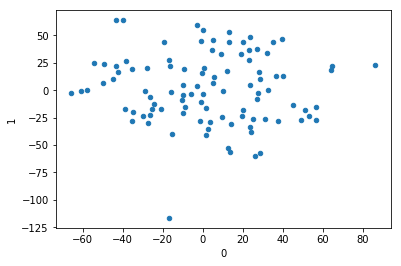

In [363]:
X=rel_count[rel_count.index.isin(coordial+nice+shorts+social+bad+tentative+time+work)].fillna(0).T
X_norm=X.join(email_metadata).drop('baseline').apply(lambda x: (x-x.mean())/x.std(),axis=0)
from sklearn.decomposition import PCA,FactorAnalysis
from sklearn.manifold import TSNE
pca=TSNE(2,learning_rate=150,perplexity=5)
pd.DataFrame(pca.fit_transform(X_norm)).plot.scatter(0,1)

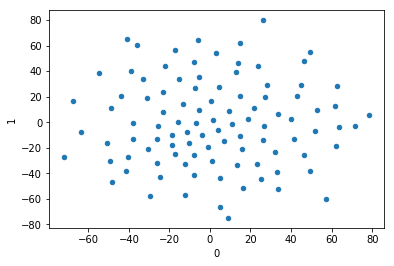

In [353]:
import matplotlib.pyplot as plt
pd.DataFrame(pca.fit_transform(X_norm)).plot.scatter(0,1)

In [349]:
#Loadings
loadings=pd.DataFrame(pca.components_).T
loadings.set_index(X_norm.columns).sort_values(3,ascending=False)

0         1         2         3         4
child          0.174218 -0.155326  0.581524  0.558022  0.099539
nicely         0.240814 -0.106106  0.544117  0.534600  0.120438
preschedule    0.131436 -0.155409  0.426224  0.525061  0.036630
schedule       0.328704 -0.145328 -0.022512  0.370741  0.059990
no             0.622706 -0.187616 -0.061691  0.309632 -0.406880
cute           0.182459 -0.164583  0.617694  0.296936 -0.174797
children       0.271144 -0.139609  0.167546  0.208938  0.167550
approved       0.129883  0.045754 -0.262525  0.204531 -0.182053
credit         0.084913  0.167989 -0.283311  0.183583 -0.178893
energy         0.345359 -0.067882 -0.383025  0.138909 -0.037787
not            0.736517 -0.118799 -0.167324  0.111904 -0.112581
work           0.641640 -0.266660  0.315030  0.108222  0.288893
email_len      0.872758 -0.163593 -0.321560  0.091062 -0.083435
fyi           -0.136095  0.054353 -0.230749  0.074187  0.354928
tomorrow       0.347584 -0.072373 -0.004334  0.074159  0.249248
is_request     0.075350 -0.022130 -0.113077  0.067490  0.067411
grandchild     0.086838  0.274241  0.167011  0.066707  0.080592
folder         0.067501 -0.013209 -0.113609  0.066339  0.166675
is_short      -0.361302  0.111472 -0.107124  0.048678  0.170754
office         0.275657 -0.021933 -0.139817  0.040120  0.198254
football       0.181093 -0.136002  0.301910  0.037828 -0.086577
need           0.361267 -0.125867 -0.250110  0.036706 -0.097859
horses         0.374585  0.854618  0.074380  0.031564  0.008332
horse          0.283950  0.859828  0.135196  0.012690 -0.011175
thanks         0.051723 -0.032007 -0.027195  0.008195  0.341804
business       0.388254 -0.002057 -0.140421 -0.007720  0.376653
perhaps        0.366391 -0.002773 -0.169002 -0.015060  0.484223
hi            -0.003270 -0.067785  0.139072 -0.019530 -0.052108
pls            0.022035 -0.021774 -0.062943 -0.023720  0.104602
funeral        0.119769 -0.060098 -0.056436 -0.024164 -0.255621
grandchildren  0.134788 -0.086817  0.006689 -0.057402 -0.083487
yes            0.105858 -0.025678  0.205156 -0.064850 -0.102460
drinks         0.121181 -0.075790  0.514768 -0.117669 -0.323248
nicest         0.252336  0.266398  0.119950 -0.120184 -0.140401
weddings       0.092280 -0.066270  0.065946 -0.131564 -0.213044
could          0.605440 -0.080916 -0.123835 -0.133465  0.201383
wedding        0.093750 -0.033193  0.151369 -0.168636 -0.152660
drinking       0.084246 -0.050567  0.121768 -0.172857 -0.502465
hello          0.090778 -0.031474  0.147015 -0.177219  0.076690
good           0.487844 -0.044606  0.291262 -0.192996  0.168847
busy           0.355752 -0.152413  0.517513 -0.244562 -0.183152
drink          0.042860 -0.070139  0.324963 -0.247484 -0.418511
might          0.674355  0.089408 -0.138789 -0.253562 -0.089044
hate           0.088364 -0.033199  0.187806 -0.278462 -0.123144
today          0.594990 -0.255682  0.172468 -0.335427  0.339812
like           0.538957 -0.099543  0.100624 -0.341170  0.196252
nice           0.399510 -0.130444  0.397396 -0.398212  0.014955
maybe          0.376924 -0.002710  0.162887 -0.512099  0.064741
funny          0.210373 -0.169985  0.402546 -0.524391 -0.273496
fun            0.338149 -0.143573  0.321793 -0.600083  0.150286

In [282]:
pd.DataFrame(pca.fit_transform(X)).sort_values(0)

0          1
1   -4.266067  -1.396579
17  -4.187744  -1.193337
7   -3.682295 -10.190613
70  -3.442466  -1.515944
77  -3.160304  -0.307616
88  -3.143988  -0.007452
13  -3.050733  -0.187294
31  -3.018074  -0.930242
9   -2.998902  -0.029026
29  -2.960271  -0.036956
14  -2.932211  -0.168819
79  -2.916082  -0.061861
52  -2.903483   0.028490
53  -2.893845  -0.253812
58  -2.889968 -21.190387
98  -2.889148  -0.093514
11  -2.887742  -0.170611
26  -2.886528  -0.084220
94  -2.876926  -0.186586
89  -2.872060  -0.110600
25  -2.866021  -0.226249
85  -2.856312  -0.208353
22  -2.855599  -0.436564
59  -2.832345   0.000185
35  -2.825114  -0.177435
4   -2.819864  -0.060901
23  -2.816210  -0.102595
3   -2.811005  -0.038267
67  -2.799996  -0.068924
60  -2.795566  -0.978190
..        ...        ...
75  -1.446220  -0.519526
65  -1.310671  -0.516044
8   -1.151623  -2.645359
10  -1.016439  -3.272515
99  -0.913487   0.459396
66  -0.886534  -3.083425
55  -0.687021  18.751398
92  -0.549592  -7.165185
90  -0.387448   1.016770
24  -0.321399   4.409457
40  -0.117567   2.056224
44   0.070991  -0.022288
39   0.268841  -0.468014
81   0.990290  -1.529087
62   1.172134  -1.361727
21   1.823681  -0.827192
41   2.142333  -0.719810
74   2.253233  10.228648
36   2.624695   7.280265
30   2.811898   0.748812
48   2.822511  -1.610492
19   3.272329  -1.718371
0    3.955265   1.036783
91   5.564095   1.769925
80   7.584739   1.066955
69  12.739050   1.444997
97  15.151500  -6.065885
84  17.082243  -7.689136
87  21.332600  57.390148
38  89.578614 -13.717786

[100 rows x 2 columns]

In [375]:
" ".join(data.query('sender=="jeff.dasovich@enron.com"').body.tolist())

'FYI. The report posted on the website fails to include the report s transmittal letter. I just found that letter in the mail. The letter explains that the report s analysis DOES NOT include "the events" of May, June and July, which the Compliance unit is currently studying. It will release the results of that study in the Fall. There appears to be a pattern forming. The administration seems to make a==20scene just prior to large events (e.g., Davis letters calling for wholesal=e=20caps just prior to the ISO Board vote, and now this on the eve of the joint==20Assembly/Senate hearing scheduled for today).In other late-breaking news. On the heels of this press conference, I=20received late last evening from Loretta Lynch s chief of staff a copy of a==20proposed decision Lynch will release today reversing last Thursday s decisi=on=20rejecting (0-5) retail price caps in San Diego. The draft decision she=20proposes would establish an "interim" retail rate cap only for SDG&E=20residential an

In [373]:
rel_count.T.sort_values('cute')

index                               a         aa       aaa  aadepartment  \
jeff.dasovich@enron.com      2.230018   0.394037  1.044199           NaN   
james.d.steffes@enron.com    0.877413        NaN       NaN           NaN   
carol.clair@enron.com        1.198557   1.210210       NaN           NaN   
eric.bass@enron.com          0.677774        NaN       NaN           NaN   
debra.perlingiere@enron.com  0.590488        NaN       NaN           NaN   
kimberly.watson@enron.com    0.435578        NaN       NaN           NaN   
baseline                     1.000000   1.000000  1.000000      1.000000   
gerald.nemec@enron.com       0.965862   0.258610       NaN           NaN   
kay.mann@enron.com           0.929031   0.347758  1.843116           NaN   
daren.j.farmer@enron.com     0.835355        NaN       NaN           NaN   
matthew.lenhart@enron.com    0.510000   0.212890       NaN           NaN   
shelley.corman@enron.com     1.685384        NaN       NaN           NaN   
john.arnold@enron.com        0.973188   0.387086  2.051556           NaN   
sally.beck@enron.com         1.902715  10.896786       NaN           NaN   
kevin.hyatt@enron.com        1.729454   2.129732       NaN           NaN   
marie.heard@enron.com        0.634956   1.748117       NaN           NaN   
tana.jones@enron.com         0.962905   0.152166  6.451854           NaN   
scott.neal@enron.com         0.603351        NaN       NaN           NaN   
jane.tholt@enron.com         0.561920        NaN       NaN           NaN   
mark.whitt@enron.com         0.728714        NaN       NaN           NaN   
lindy.donoho@enron.com       0.926361        NaN       NaN           NaN   
chris.germany@enron.com      0.798849        NaN       NaN           NaN   
larry.f.campbell@enron.com   2.483271        NaN       NaN           NaN   
stacy.dickson@enron.com      0.550557        NaN       NaN           NaN   
stanley.horton@enron.com     0.736638        NaN       NaN           NaN   
kate.symes@enron.com         1.017839        NaN       NaN           NaN   
susan.scott@enron.com        2.148844   2.254788       NaN           NaN   
mike.maggi@enron.com         0.136615        NaN       NaN           NaN   
dana.davis@enron.com         0.912554        NaN       NaN           NaN   
sandra.f.brawner@enron.com   0.750604        NaN       NaN           NaN   
...                               ...        ...       ...           ...   
martin.cuilla@enron.com      1.109301        NaN       NaN           NaN   
mary.hain@enron.com          1.831814        NaN       NaN           NaN   
matt.smith@enron.com         1.092442   3.549554       NaN           NaN   
michelle.cash@enron.com      0.861922   0.925182       NaN           NaN   
michelle.lokay@enron.com     0.377715        NaN       NaN           NaN   
mike.carson@enron.com        0.527848        NaN       NaN           NaN   
mike.grigsby@enron.com       0.646444        NaN       NaN           NaN   
monika.causholli@enron.com   1.246684        NaN       NaN           NaN   
monique.sanchez@enron.com    1.752074        NaN       NaN           NaN   
paul.d.thomas@enron.com      1.331620   4.052849       NaN           NaN   
paul.lucci@enron.com         0.605992        NaN       NaN           NaN   
paul.y barbo@enron.com       1.405412        NaN       NaN           NaN   
phillip.k.ellen@enron.com    1.295185        NaN       NaN           NaN   
phillip.m.love@enron.com     0.673387        NaN       NaN           NaN   
richard.b.sanders@enron.com  0.560211        NaN  9.480676           NaN   
richard.shapiro@enron.com    1.451130        NaN       NaN           NaN   
rick.buy@enron.com           0.773633   2.804209       NaN           NaN   
robin.rodrigue@enron.com     0.871544   1.599652       NaN           NaN   
rod.hayslett@enron.com       0.364639   3.549554       NaN           NaN   
sara.shackleton@enron.com    0.816371   1.547609  4.101164           NaN   
stacey.w.white@enron.com     0.183032   1.872696